<a href="https://colab.research.google.com/github/sarbashreeeeee/HeartWise-Heart-Disease-Detection/blob/main/Heart_Disease_Detection_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Disease Prediction using Framingham Dataset**

#**About The Project**

Heart disease remains one of the leading causes of mortality worldwide. Early detection of heart disease can significantly improve preventive care and save lives. In this project,  the Framingham Heart Study dataset has been used, a well-known dataset in cardiovascular research, to build a predictive model that identifies whether a person is likely to develop heart disease.

The objective of this project is to develop a classification model to predict the risk of Heart Disease for any given person. For this project, the XGBoost Classifier has been chosen, a powerful and efficient gradient boosting algorithm known for its high predictive performance and robustness.


#**Dataset Description**

The Framingham Heart Study dataset consists of health and lifestyle information collected over several decades. It includes variables such as age, gender, cholesterol levels, blood pressure, smoking habits, diabetes status, and more — all of which are important factors in cardiovascular health.

**Key points about the dataset:**


*   **Total records:** 4,240 individuals
*   **Features:** 15 variables related to health, behavior, and medical history
*   **Target variable:** TenYearCHD (indicating the presence or absence of coronary heart disease within 10 years)

The following are the features for a particular individual:

1. **sex:** Male or Female

2. **age:** Age of the patient

3. **education:** no information provided

4. **currentSmoker:** Whether or not the patient is a current smoker

5. **cigsPerDay:** Number of cigarettes smoked by the person per day on average

6. **BPMeds:** Whether or not the patient is on blood pressure medication

7. **prevalentStroke:** Whether or not the patient previously had a stroke

8. **prevalentHyp:** Whether or not the patient was hypertensive

9. **diabetes:** Whether or not the patient has diabetes

10. **totChol:** Total cholesterol level in mg/dL

11. **sysBP:** systolic blood pressure in mmHg

12. **diaBP:** diastolic blood pressure in mmHg

13. **BMI:** Body Mass Index

14. **heartRate:** Heart rate

15. **glucose:** glucose level in mg/dL

16. **TenYearCHD:** 10-year risk of coronary heart disease (Target Variable)

Here is the link to the dataset:
*https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset*






# Imports

In [2]:
!pip install imbalanced-learn
!pip install optuna

import pandas as pd
import numpy as np
import optuna

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
import xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 14.6 MB/s eta 0:00:00


In [3]:
#Reading the file

df = pd.read_csv('/content/framingham (version 1).csv')

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Removing the education column just because of the project's requirement

df = df.drop('education', axis=1)

In [6]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [24]:
df.corr()['TenYearCHD'].sort_values(ascending=False)

,TenYearCHD
TenYearCHD,1.000000
age,0.225408
sysBP,0.215898
prevalentHyp,0.177458
diaBP,0.145112
glucose,0.118911
diabetes,0.097344
male,0.088374
BPMeds,0.086448
totChol,0.080139


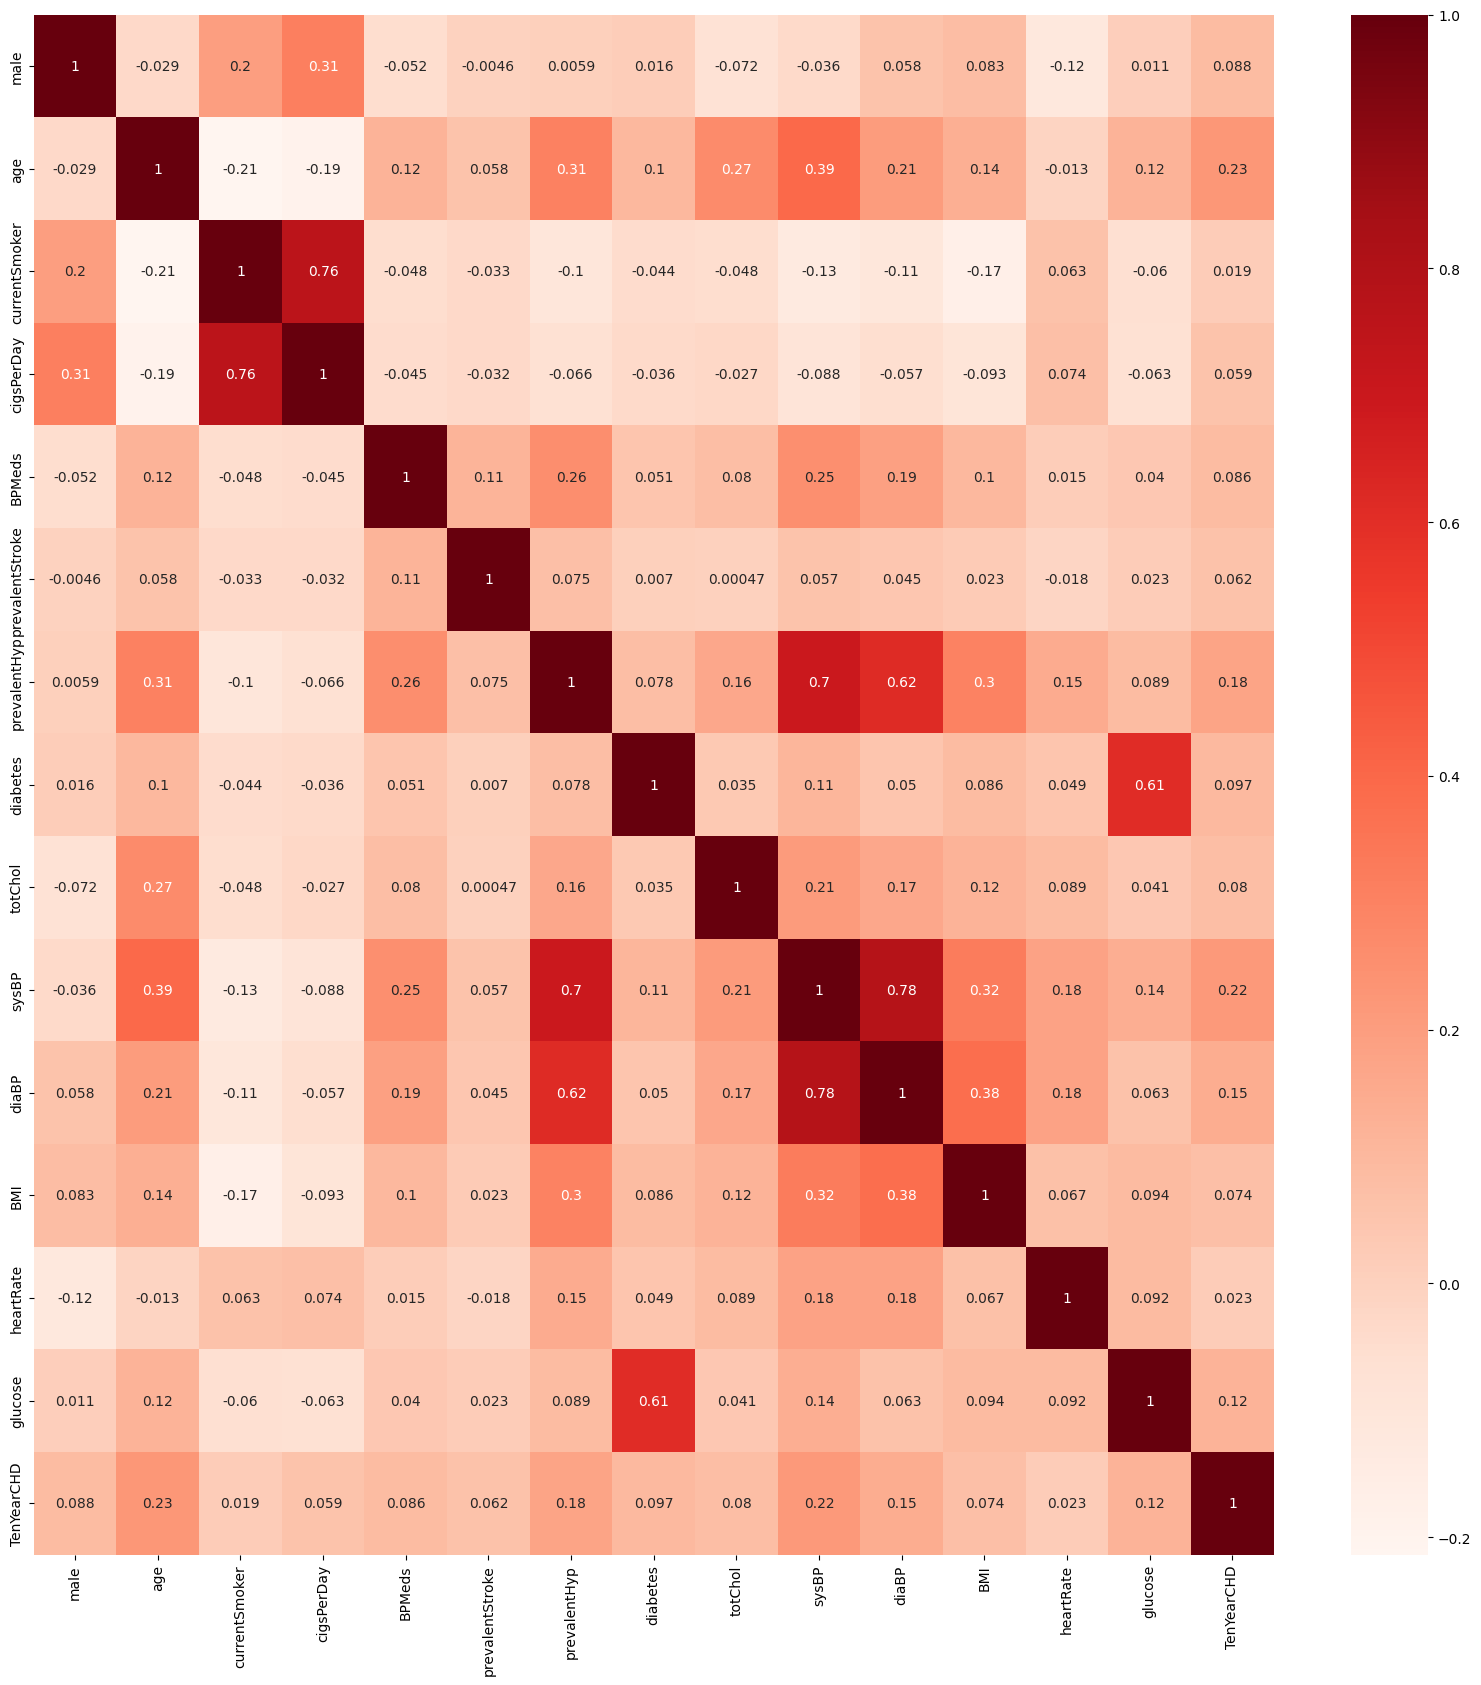

In [25]:
# Correlation Heatmap

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot = True, cmap = "Reds")
plt.show()

In [ ]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


##**There are some missing values, so here are some visualizations of them.**

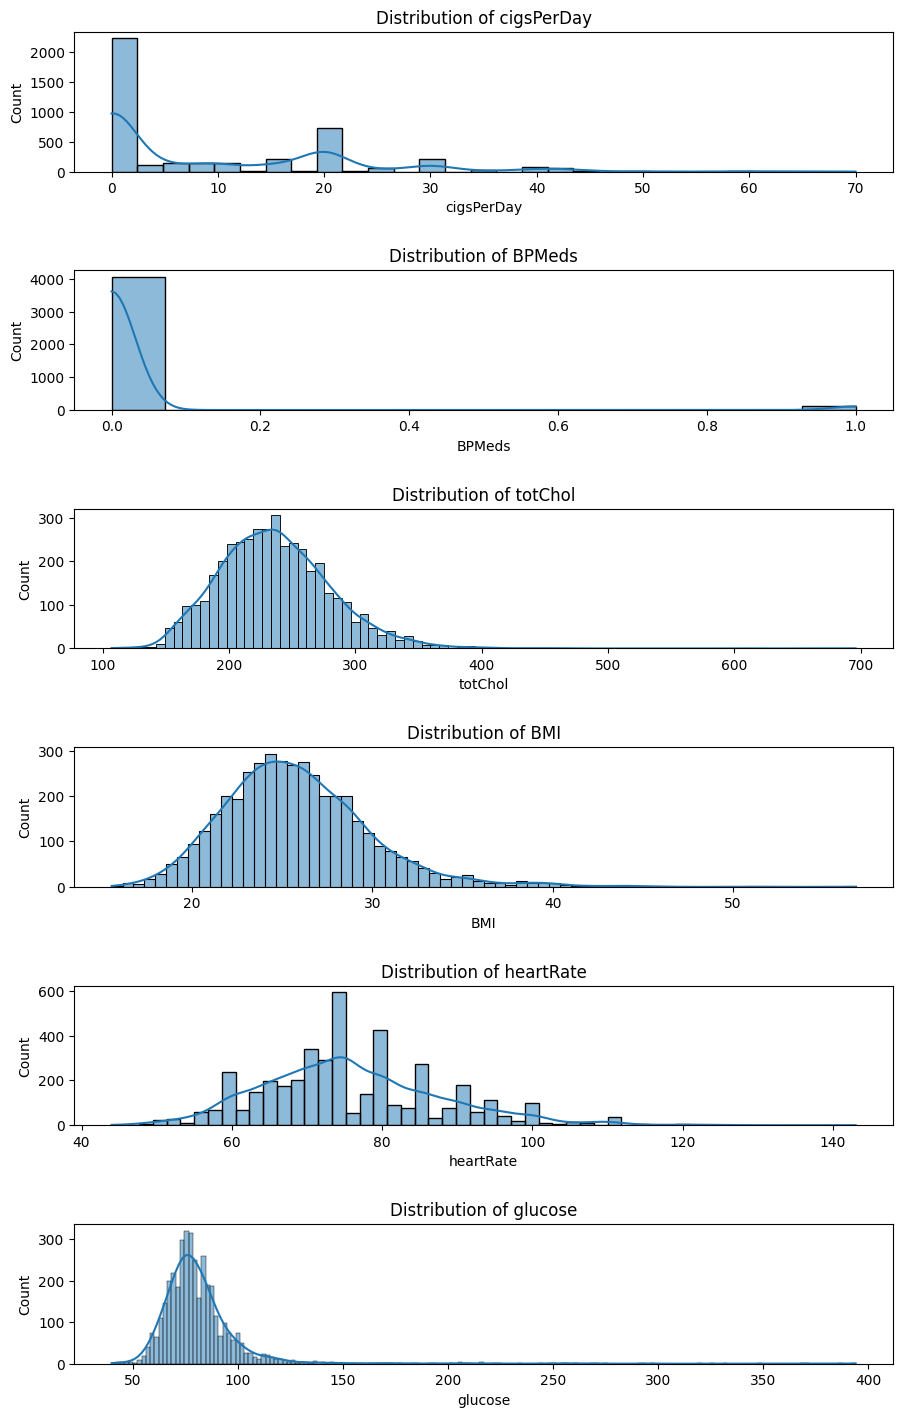

In [9]:
cols_with_missing_values = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Plotting the distributions of columns with missing values in a histogram
fig, axes = plt.subplots(len(cols_with_missing_values), 1, figsize=(10, 15)) # Returns a figure and an array of axes
fig.tight_layout(pad=5.0)

for i, col in enumerate(cols_with_missing_values):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.show()

##**Filling the missing values.**

In [10]:
imputer = SimpleImputer(strategy='median')

numcols = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
imputer.fit(df[numcols])

df[numcols] = imputer.transform(df[numcols])

In [11]:
# Checking if there are any missing values left

df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [12]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


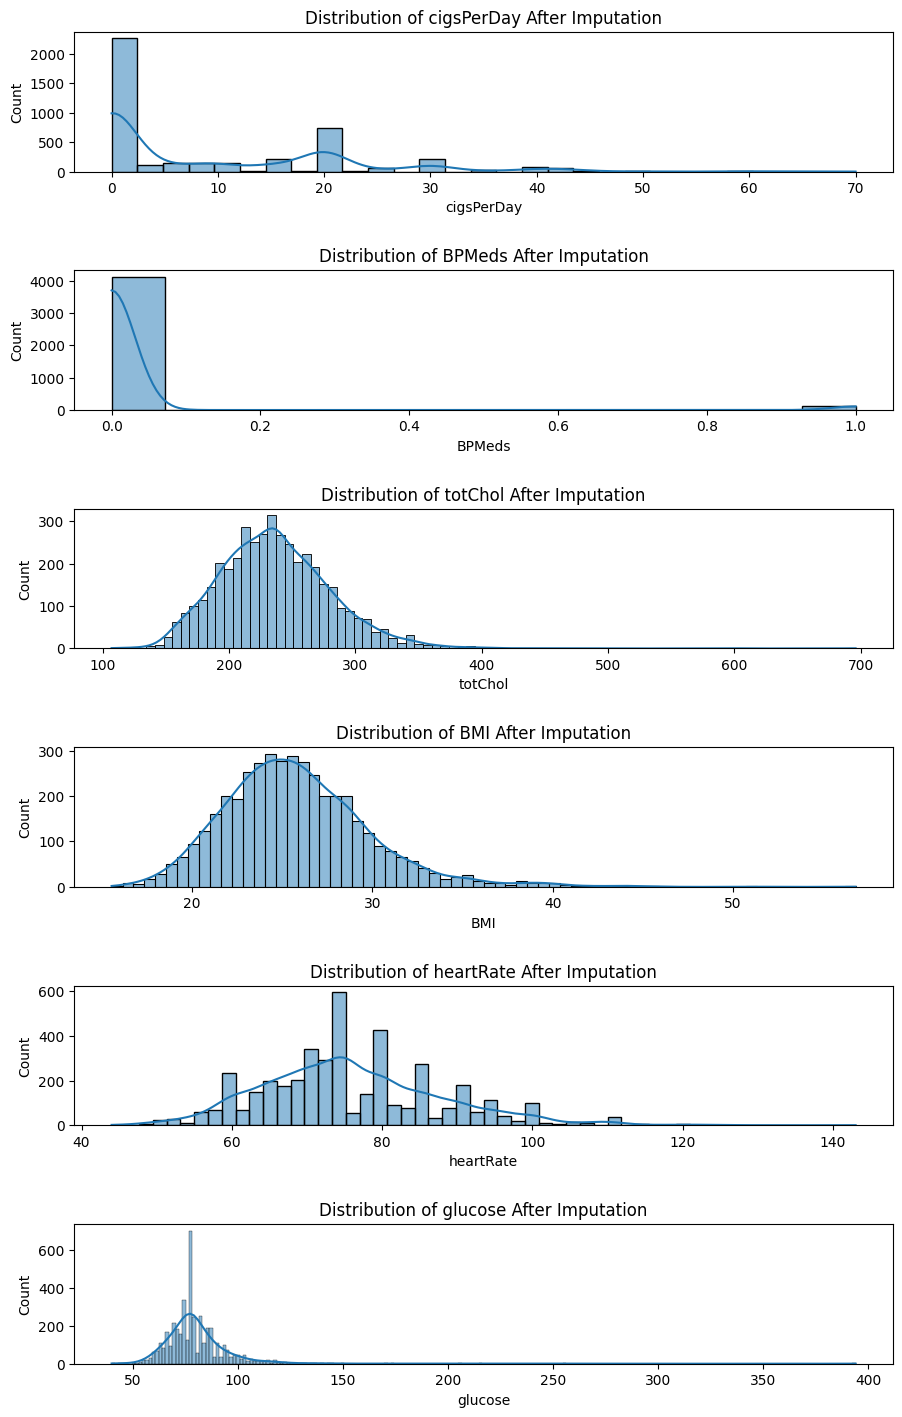

In [13]:
# Plotting the distributions after imputation

fig, axes = plt.subplots(len(cols_with_missing_values), 1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

for i, col in enumerate(cols_with_missing_values):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} After Imputation')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.show()

##**Checking and removing duplicates.**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


##**Checking For Outliers**

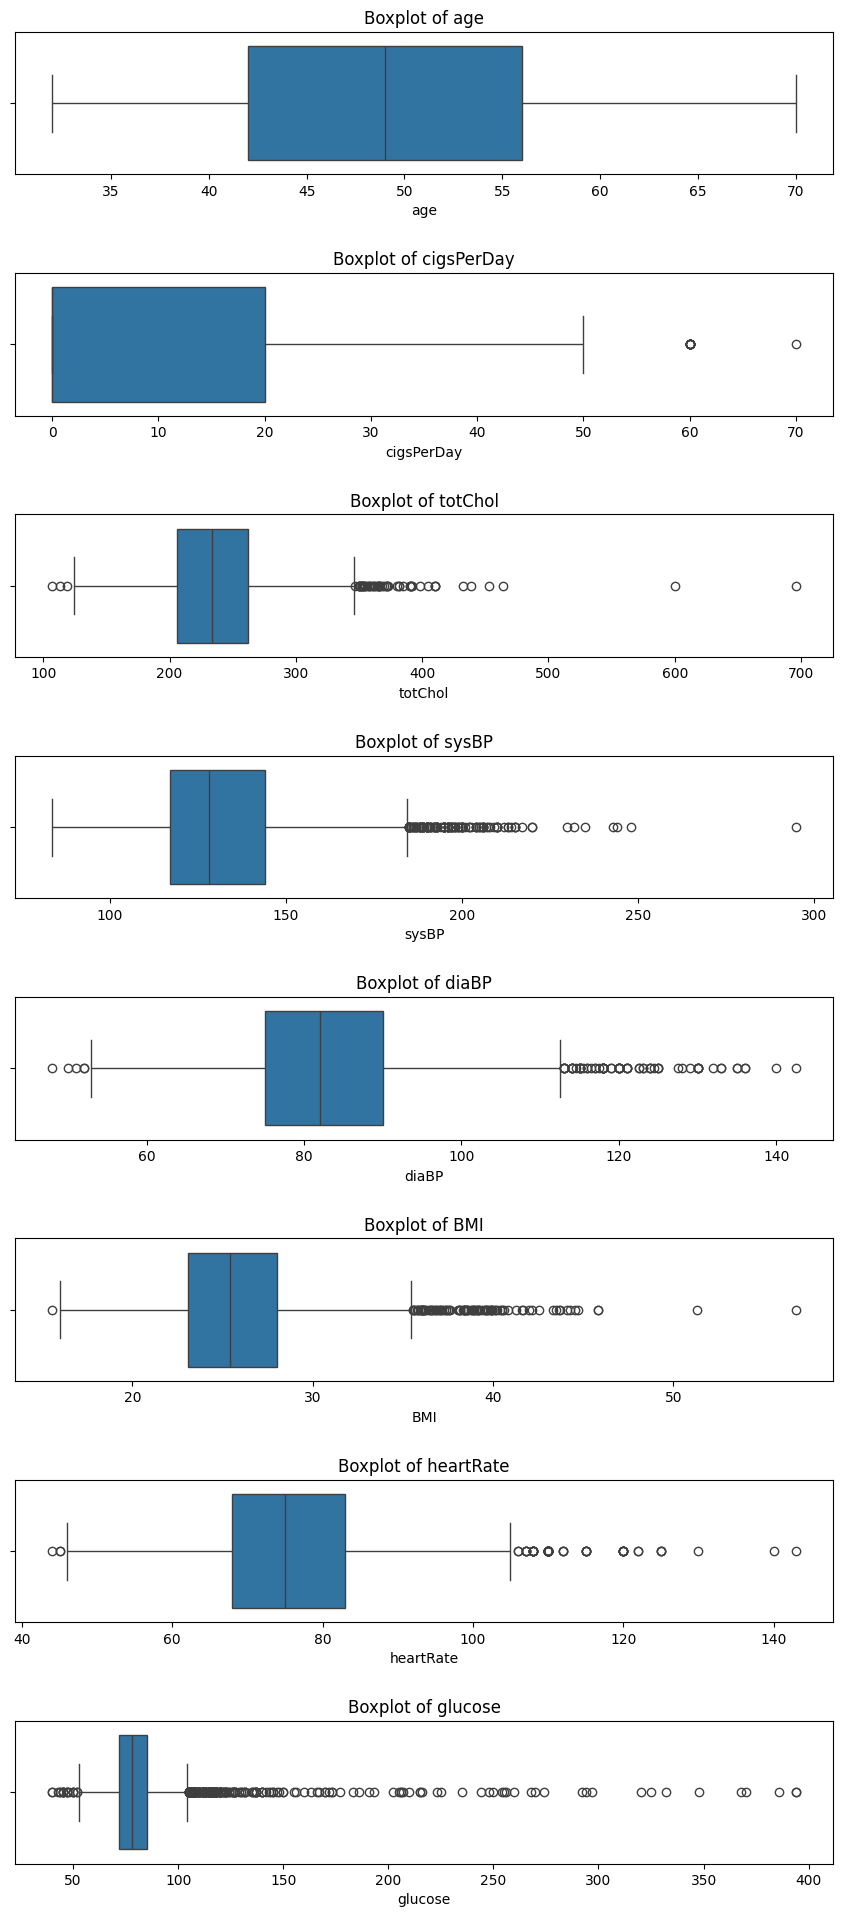

In [14]:
# Selecting continuous variables for outlier detection
continuous_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Plotting the boxplots for continuous variables
fig, axes = plt.subplots(len(continuous_cols), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(continuous_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.show()

##**Clipping the variables with high outliers.**

####Age

In [17]:
#None

####Cigarettes Per Day

In [ ]:
#None

#### Sys bp

In [18]:
df['sysBP'] = np.clip(df['sysBP'], 70, 250)

#### Dia bp

In [ ]:
# None

#### Total Cholesterol

In [19]:
df['totChol'] = np.clip(df['totChol'], 50, 400)

#### BMI

In [20]:
df['BMI'] = np.clip(df['BMI'], 10, 50)

#### Glucose

In [21]:
df['glucose'] = np.clip(df['glucose'], 40, 250)

#### Heart Rate

In [ ]:
# None

##**Clipping results**

In [22]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.498113,132.343986,82.897759,25.797099,75.878774,81.316274,0.151887
std,0.495027,8.572942,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,43.326283,21.965671,11.910394,4.058035,12.023937,19.942657,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,400.000000,250.000000,142.500000,50.000000,143.000000,250.000000,1.000000


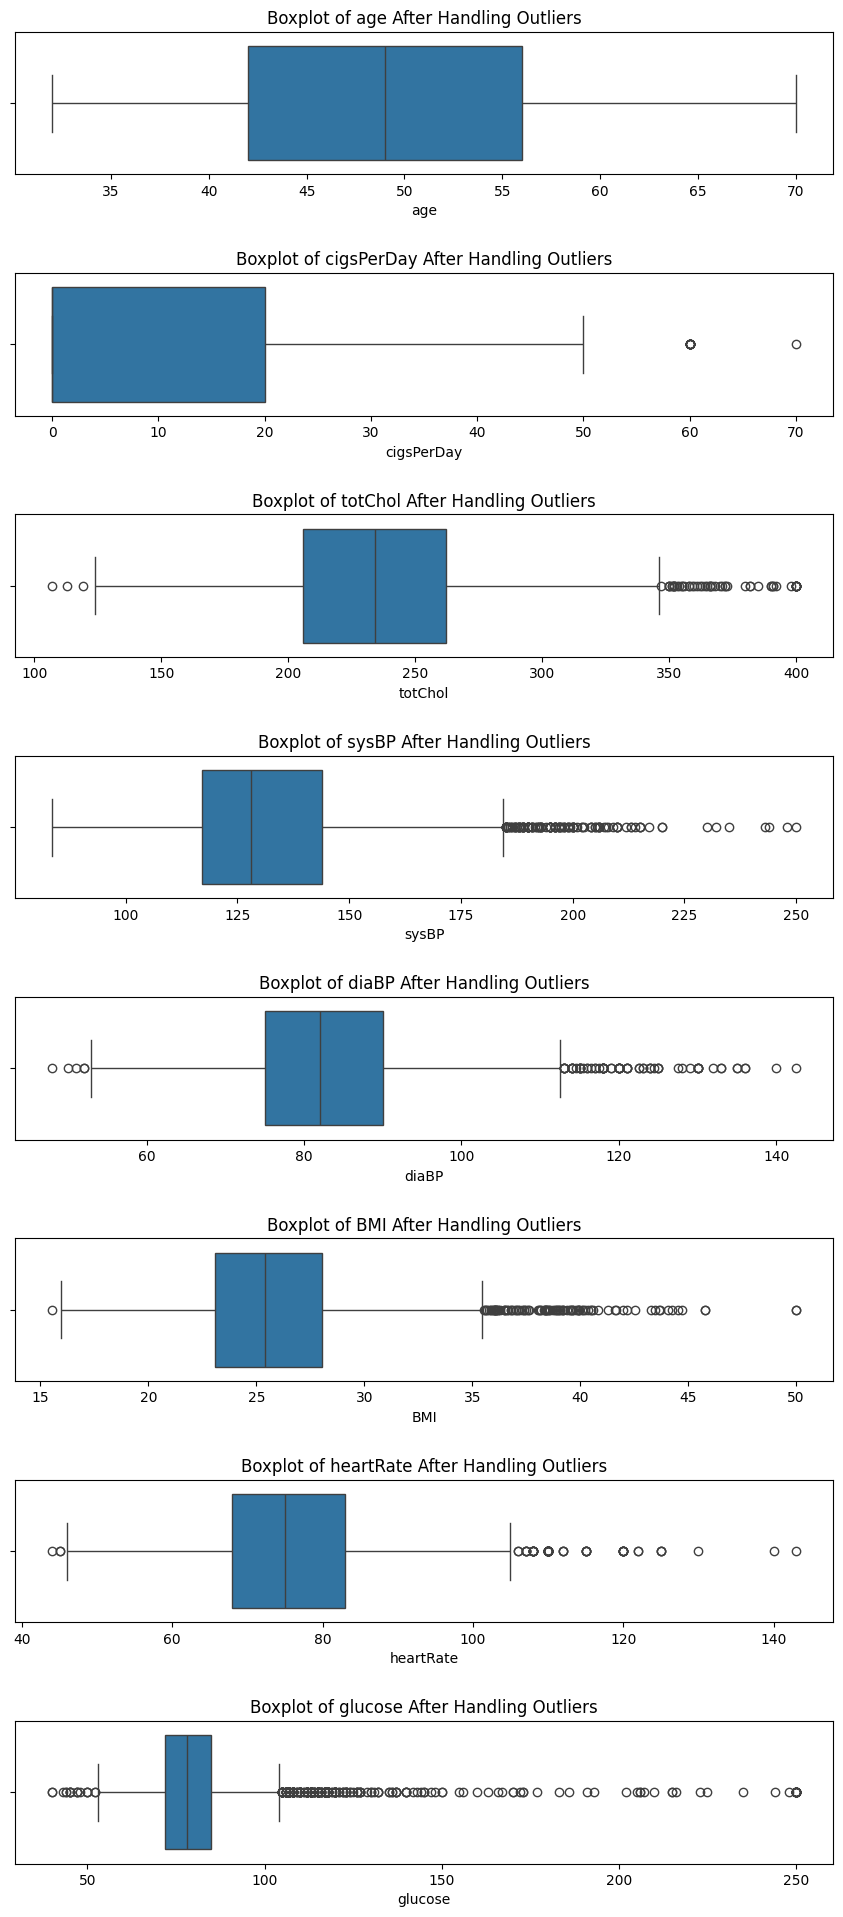

In [23]:
# Plotting the boxplots for continuous variables after handling outliers

fig, axes = plt.subplots(len(continuous_cols), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(continuous_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} After Handling Outliers')
    axes[i].set_xlabel(col)

plt.show()

## **Model Training**

In [ ]:
# Splitting the dataset into features and target variable

x = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [ ]:
# Splitting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Hyperparameter Tuning with Optuna and SMOTE**

To improve the XGBoost model's performance, its hyperparameters are optimized using **Optuna**, a powerful hyperparameter optimization framework. An objective function is defined that suggests different hyperparameter values, applies SMOTE to handle class imbalance, trains the model, and evaluates it using the F1 score. Optuna iteratively explores different configurations to find the best-performing combination of hyperparameters.

In [ ]:
def objective(trial, X_train_opt, y_train_opt, X_test_opt, y_test_opt):
    # Suggest values for the hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 5.0, 10.0)

    smote = SMOTE(sampling_strategy='minority', random_state=42)
    x_train_smote, y_train_smote = smote.fit_resample(X_train_opt, y_train_opt)

    # Train XGBoost model with the suggested hyperparameters
    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )

    # Train the model on the SMOTE data
    model.fit(x_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test_opt)

    # Evaluate the model using F1 Score (weighted)
    f1_class_1 = f1_score(y_test_opt, y_pred)

    return f1_class_1

### **Running the Optuna Optimization Study**

After defining the objective function, the Optuna study is run to search for the best hyperparameters. We set the study direction to **maximize** since we aim to maximize the F1 score. The study iterates over 50 trials, each with a different hyperparameter configuration, and prints the best parameters and corresponding performance score found.

In [ ]:
study = optuna.create_study(direction='maximize')  # We are maximizing the F1 score

# Optimize the objective function
study.optimize(lambda trial: objective(trial, x_train, y_train, x_test, y_test), n_trials=50)

# Print the best hyperparameters and performance
print(f"Best hyperparameters: {study.best_params}")
print(f"Best F1 Score: {study.best_value:.4f}")

[I 2025-06-01 01:53:22,169] A new study created in memory with name: no-name-e478da65-bd4d-4053-9c63-5886ca68e0f6
<ipython-input-23-b70a7b8efea2>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
[I 2025-06-01 01:53:24,458] Trial 0 finished with value: 0.2799043062200957 and parameters: {'learning_rate': 0.0012985131802954076, 'max_depth': 7, 'n_estimators': 514, 'scale_pos_weight': 5.25094321941804}. Best is trial 0 with value: 0.2799043062200957.
<ipython-input-23-b70a7b8efea2>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
[I 20

Best hyperparameters: {'learning_rate': 0.0016365717671471634, 'max_depth': 8, 'n_estimators': 791, 'scale_pos_weight': 6.0141699348806545}
Best F1 Score: 0.3047


##**Final Model Training and Evaluation**

Using the best hyperparameters obtained from Optuna, we train our final XGBoost model on a balanced training dataset created using SMOTE. We then evaluate the model's performance on the test set using metrics such as precision, recall, F1 score, and a confusion matrix.

In [ ]:
hyperparams = study.best_params

model = XGBClassifier(
    learning_rate=hyperparams['learning_rate'],
    max_depth=hyperparams['max_depth'],
    n_estimators=hyperparams['n_estimators'],
    scale_pos_weight=hyperparams['scale_pos_weight'],
    random_state=42
)

smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

model.fit(x_train_smote, y_train_smote)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.38      0.54       725
           1       0.19      0.84      0.30       123

    accuracy                           0.45       848
   macro avg       0.56      0.61      0.42       848
weighted avg       0.82      0.45      0.51       848

[[275 450]
 [ 20 103]]


##  **Saving the Trained Model**

After successfully training and evaluating our XGBoost model, we save it to disk so it can be reused without retraining. We use `joblib`, a popular library for efficiently serializing large objects like machine learning models. The model is saved inside a `models` directory as `model.joblib`.


In [ ]:
import os

os.makedirs("models", exist_ok=True)
from joblib import dump

dump(model, "models/model.joblib")